<a href="https://colab.research.google.com/github/PaulToronto/Hands-on-Maching-Learning-Book/blob/main/2_1_KMeans_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 KMeans Tutorial

- the k-means algorithm is computationally efficient compared to other clustering algorithms
- it belongs to the category of **prototype-based clustering**
    - each cluster is represented by a prototype, which can be
        - the **centroid** (average) of similar points with continuous features
        - the **medoid** (the most representative or most frequently occuring point) in the case of categorical features
- k-means is very good and identifying clusters with a spherical shape
- must specify the number of clusters, $k$, a priori (this is one of drawbacks of this clustering algorithm)
    - a bad choice for $k$ can result in poor clustering performance
- The example used here is a two-dimensional dataset for the purpose of visualization, but k-means clustering can be applied to higher dimensions

## Imports

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

## Data

In [2]:
X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0
)

X.shape, y.shape

((150, 2), (150,))

In [3]:
X[:5]

array([[2.60509732, 1.22529553],
       [0.5323772 , 3.31338909],
       [0.802314  , 4.38196181],
       [0.5285368 , 4.49723858],
       [2.61858548, 0.35769791]])

In [4]:
y[:5]

array([1, 0, 0, 0, 1])

In [5]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

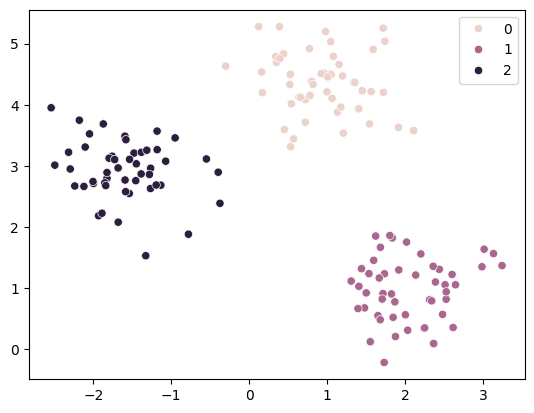

In [6]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y);

- Note that in a real-world application, we do not have any ground truth category information about the clusters as we do here
    - If we did, it would fall into the category of supervised learning

## The k-means algorithm

1. Randomly pick $k$ centroids from the sample points as initial cluster centres
    - <img src='https://raw.githubusercontent.com/PaulToronto/Hands-on-Maching-Learning-Book/main/images/step1.png'/>
2. Assign each sample to the nearest centroid
    - <img src='https://raw.githubusercontent.com/PaulToronto/Hands-on-Maching-Learning-Book/main/images/step2.png'/>
3. Move the centroids to the center of the samples that were assigned to it
    - <img src='https://raw.githubusercontent.com/PaulToronto/Hands-on-Maching-Learning-Book/main/images/step3.png'/>
4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached
    - Next iteration of Step 2
    - <img src='https://raw.githubusercontent.com/PaulToronto/Hands-on-Maching-Learning-Book/main/images/step3.png'/>
    - Next iteration of Step 3
    - <img src='https://raw.githubusercontent.com/PaulToronto/Hands-on-Maching-Learning-Book/main/images/step4_2.png'/>
        - When data points stop changing clusters and the centroids are no longer shifting, clustering is complete

## k-Means Clustering using `scikit-learn`

In [7]:
kmeans = KMeans(
    n_clusters=3,
    n_init=10,      # run the algorithm 10 times independantly, take the one with lowest SSE (Sum of Squared Errors)
    max_iter=300,    # max interations for each of the 10 runs, may stop early if convergence is reached
    random_state=0
)

kmeans

KMeans(n_clusters=3, n_init=10, random_state=0)

In [8]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [9]:
kmeans.cluster_centers_

array([[-1.5947298 ,  2.92236966],
       [ 2.06521743,  0.96137409],
       [ 0.9329651 ,  4.35420712]])

In [10]:
kmeans.labels_

array([1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int32)

In [11]:
pred = kmeans.predict(X)
pred

array([1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int32)

## Visualization

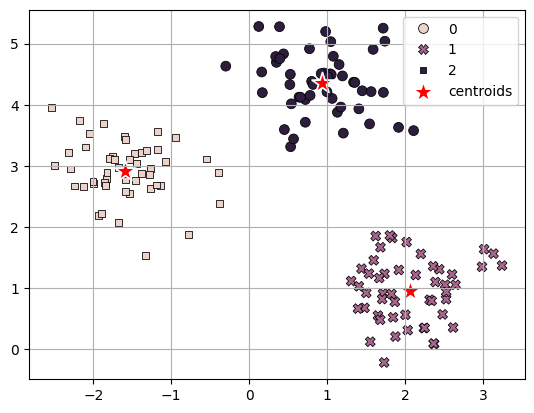

In [12]:
# we happen to have `y` as our ground truth
sns.scatterplot(x=X[:, 0], y=X[:, 1],
                    s=50, edgecolor='k',
                    hue=pred, style=y)

sns.scatterplot(x = kmeans.cluster_centers_[:, 0],
                y=kmeans.cluster_centers_[:, 1],
                s=250,
                c='red',
                marker='*',
                label='centroids')

plt.grid()
plt.show()

## `kmeans.transform()`

The `transform` method of KMeans **computes the Euclidean distance of each sample to the cluster centers**, rather than just assigning cluster labels.

In [13]:
X_transformed = kmeans.transform(X)
X_transformed[:5]

array([[4.52974707, 0.60093662, 3.54769136],
       [2.16274835, 2.80741406, 1.11524564],
       [2.80646188, 3.6462783 , 0.13356658],
       [2.64357205, 3.85535018, 0.42897581],
       [4.93250108, 0.81892682, 4.33744187]])

In [14]:
X_transformed.argmin(axis=1) == kmeans.labels_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [15]:
# Inertia is the sum of squared distance of
#. samples to their closest cluster center.

kmeans.inertia_

72.47601670996696

In [16]:
distances = []
for x, min_index in zip(X_transformed, X_transformed.argmin(axis=1)):
    distances.append(x[min_index])

In [17]:
distances = np.array(distances)
(distances**2).sum() # manual calculation of intertia_

72.47601670996703

## The Elbow Method

- used to determine the optimal $k$


In [18]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(
    n_clusters=i,
    n_init=10,
    max_iter=300,
    random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

inertia

[713.699828943416,
 283.461017802093,
 72.47601670996696,
 62.87762507747094,
 54.265024736196736,
 47.53131012250909,
 39.810793656330645,
 35.43967265728275,
 30.76354507878705,
 28.066540860145885]

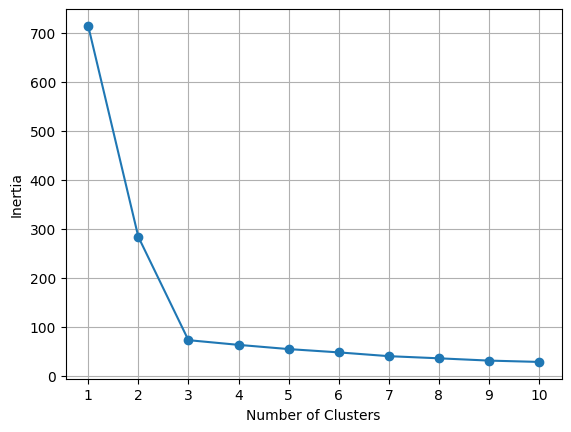

In [19]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

- From the visualization we can see that the elbow is located at $k = 3$, which is evidence that $k = 3$ is a good choice for this dataset.

## For further study:

- **Silhouette plots**: another method used to select optimal $k$
- **k-means++**: a variant of k-means that improves clustering results through more clever seeding of the initial cluster centres
- there are also other clustering algorithms which don't require specifying the number of clusters upfront. They also don't assume spherical structures in our dataset:
    - hierarchical clustering
    - density-based clustering